### iexcloud.io

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
import matplotlib.patches as mpatches

c = p.Client(api_token='pk_5f448ee7ba2f45cfb28974df0459c811')
c.symbolsDF().head(10)

,cik,currency,date,exchange,figi,iexId,isEnabled,name,region,type
symbol,,,,,,,,,,
A,1090872,USD,2020-04-22,NYS,BBG000C2V3D6,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,cs
AA,1675149,USD,2020-04-22,NYS,BBG00B3T3HD3,IEX_4238333734532D52,True,Alcoa Corp.,US,cs
AAAU,None,USD,2020-04-22,PSE,BBG00LPXX872,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,et
AACG,None,USD,2020-04-22,NAS,BBG000V2S3P6,IEX_44595A4C53392D52,True,ATA Creativity Global Sponsored ADR,US,ad
AADR,None,USD,2020-04-22,PSE,BBG000BDYRW6,IEX_5253355435362D52,True,AdvisorShares Dorsey Wright ADR ETF,US,et
AAL,6201,USD,2020-04-22,NAS,BBG005P7Q881,IEX_4353464A535A2D52,True,American Airlines Group Inc.,US,cs
AAMC,1555074,USD,2020-04-22,ASE,BBG003PNL136,IEX_5442323844432D52,True,Altisource Asset Management Corp.,US,cs
AAME,8177,USD,2020-04-22,NAS,BBG000B9XB24,IEX_5737584C53442D52,True,Atlantic American Corporation,US,cs
AAN,706688,USD,2020-04-22,NYS,BBG000D9V7T4,IEX_534D305A30592D52,True,Aaron's Inc.,US,cs


In [38]:
ticker = 'AAPL'
timeframe = '1y'
df = c.chartDF(ticker, timeframe)
df.head()

,change,changeOverTime,changePercent,close,high,label,low,open,uClose,uHigh,uLow,uOpen,uVolume,volume
date,,,,,,,,,,,,,,
2019-04-22,0.00,0.000000,0.0000,204.53,204.94,"Apr 22, 19",202.34,202.83,204.53,204.94,202.34,202.83,19439545,19439545
2019-04-23,2.95,0.014423,1.4423,207.48,207.75,"Apr 23, 19",203.90,204.43,207.48,207.75,203.90,204.43,23322991,23322991
2019-04-24,-0.32,0.012859,-0.1542,207.16,208.48,"Apr 24, 19",207.05,207.36,207.16,208.48,207.05,207.36,17540609,17540609
2019-04-25,-1.88,0.003667,-0.9075,205.28,207.76,"Apr 25, 19",205.12,206.83,205.28,207.76,205.12,206.83,18543206,18543206
2019-04-26,-0.98,-0.001125,-0.4774,204.30,205.00,"Apr 26, 19",202.12,204.90,204.30,205.00,202.12,204.90,18649102,18649102


In [39]:
df = df[['close']]
df.head()

,close
date,
2019-04-22,204.53
2019-04-23,207.48
2019-04-24,207.16
2019-04-25,205.28
2019-04-26,204.30


In [40]:
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
df.head()

,ds,y
0,2019-04-22,204.53
1,2019-04-23,207.48
2,2019-04-24,207.16
3,2019-04-25,205.28
4,2019-04-26,204.30


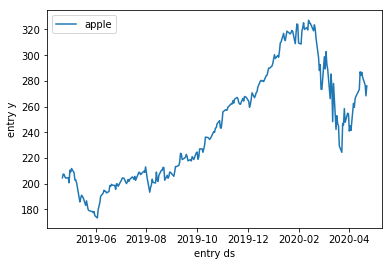

In [41]:
plt.plot(df.ds, df.y, label='apple')
plt.xlabel('entry ds')
plt.ylabel('entry y')
plt.legend(loc='upper left')
plt.show()

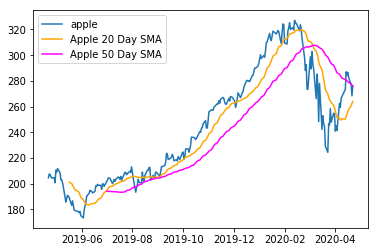

In [42]:
rolling_mean20 = df.y.rolling(window=20).mean()
rolling_mean50 = df.y.rolling(window=50).mean()
plt.plot(df.ds, df.y, label='apple')
plt.plot(df.ds, rolling_mean20, label='Apple 20 Day SMA', color='orange')
plt.plot(df.ds, rolling_mean50, label='Apple 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

A moving average can help an analyst filter noise and create a smooth curve from an otherwise noisy curve. 

It is important to note moving averages lag because they are based on historical data, not current price.

Simple Moving Average (SMA) takes the average over some set number of time periods. So a 10 period SMA would be over 10 periods (usually meaning 10 trading days).

Exponential Moving Average (EMA):

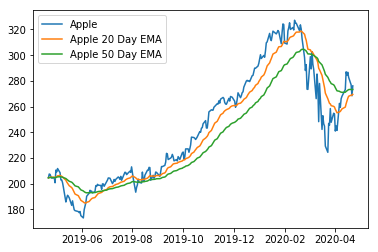

In [43]:
exp1 = df.y.ewm(span=20, adjust=False).mean()
exp2 = df.y.ewm(span=50, adjust=False).mean()
plt.plot(df.ds, df.y, label='Apple')
plt.plot(df.ds, exp1, label='Apple 20 Day EMA')
plt.plot(df.ds, exp2, label='Apple 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

* When short-term crosses above long-term we get a buy signal. 
* When short-term passes below the longer-term we get a sell signal.